TSNE ембеддингов фасстекста (2д и 3д), обученного на токенах BPE и SentencePieceBPE соответственно

In [1]:
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [2]:
class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)
        
def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

In [4]:
def tsne_plot_2D(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=90, n_components=2, init='pca', n_iter=2500, n_iter_without_progress=100,
                      random_state=42, learning_rate=150)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [3]:
def tsne_plot_3D(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=90, n_components=3, init='pca', n_iter=2500, n_iter_without_progress=100,
                      random_state=42, learning_rate=150)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    z = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        z.append(value[2])
        
    fig = plt.figure(figsize=(16,16)) 
    ax = fig.gca(projection='3d')

    for i in range(len(x)):
            ax.scatter(x[i], y[i], z[i], s=20)

    xyz_ = zip(x, y, z)

    for label, coord in zip(labels, xyz_): 
        annotate3D(ax, s=label, xyz=coord, fontsize=10, xytext=(-3,3),
                   textcoords='offset points', ha='right',va='bottom') 

    plt.show()

# Jane

In [5]:
fw2vec = 'bpe_ft_500.vec'
w2vec = KeyedVectors.load_word2vec_format(fw2vec)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


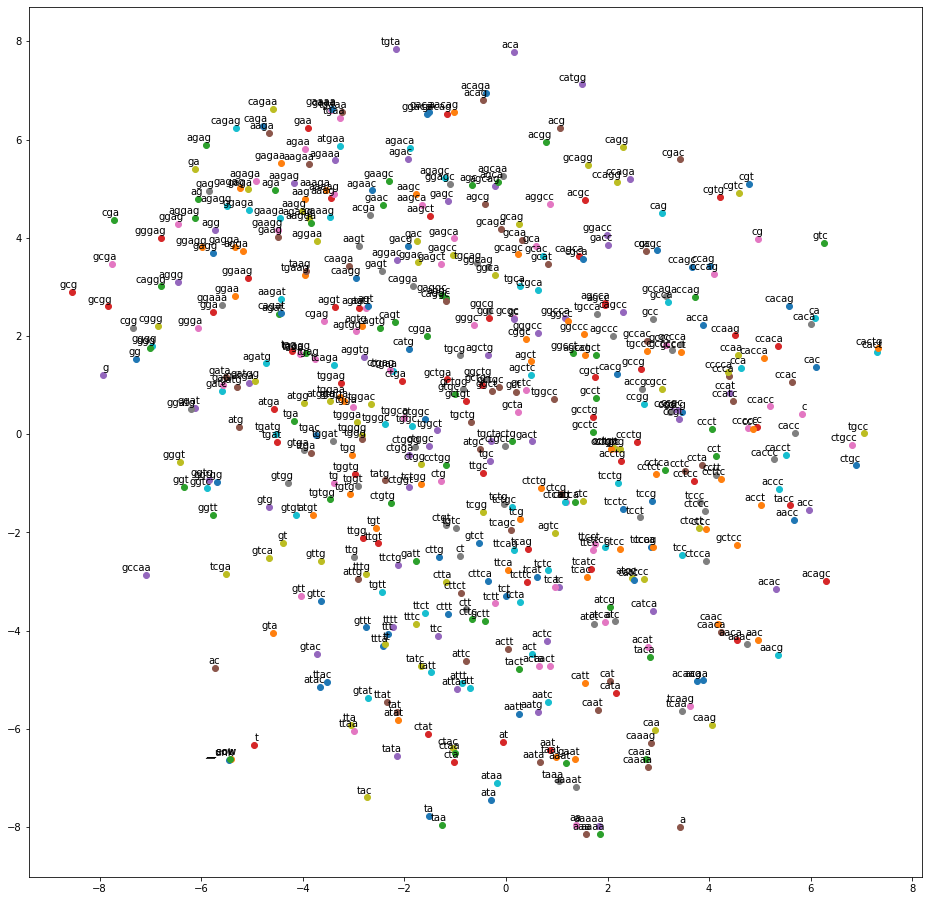

In [6]:
tsne_plot_2D(w2vec)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


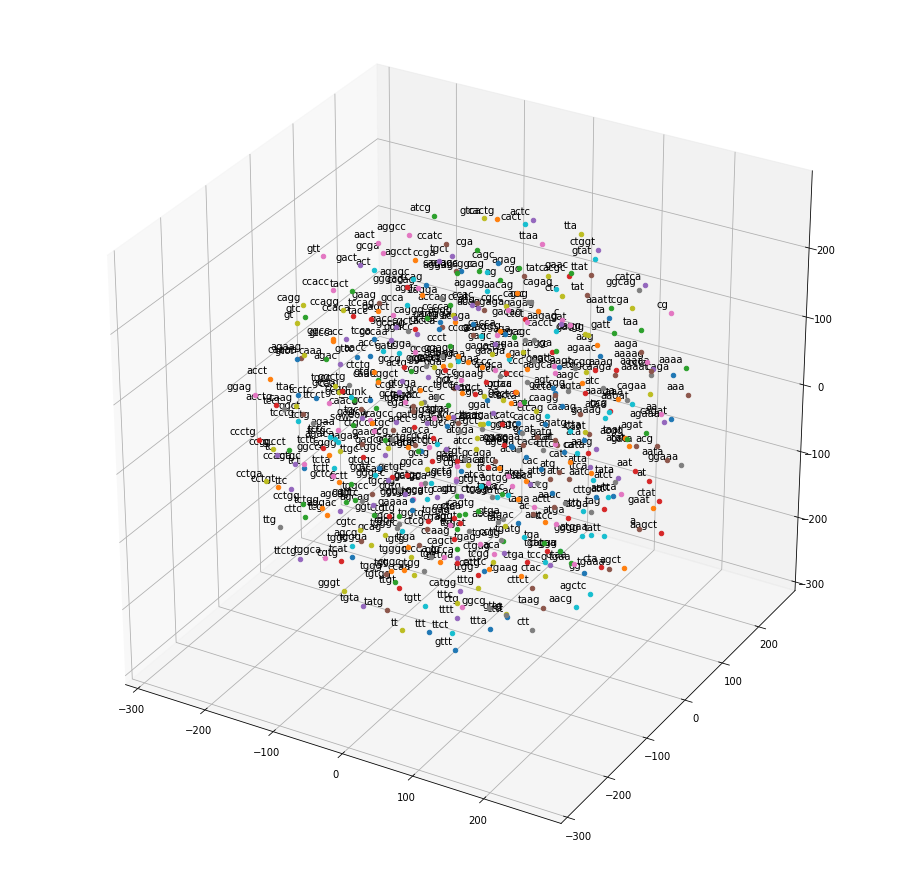

In [7]:
tsne_plot_3D(w2vec)

# Antonio

In [8]:
antonio = KeyedVectors.load_word2vec_format('ft_300-Copy1.vec')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


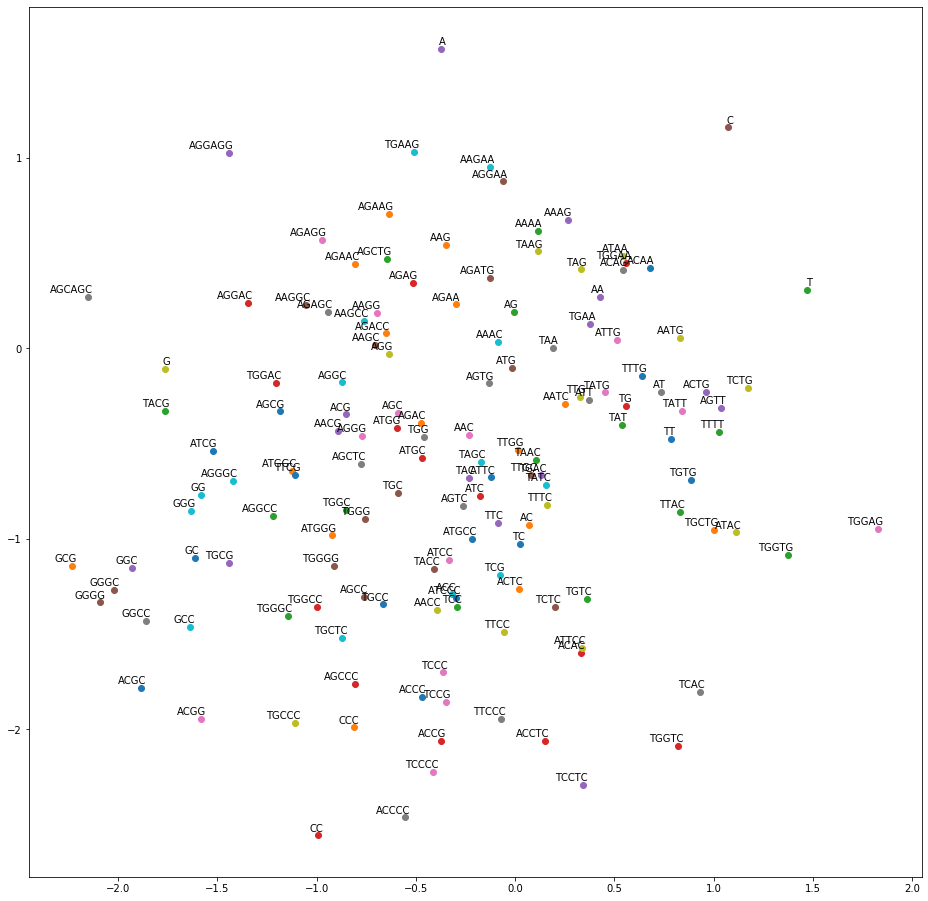

In [9]:
tsne_plot_2D(antonio)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


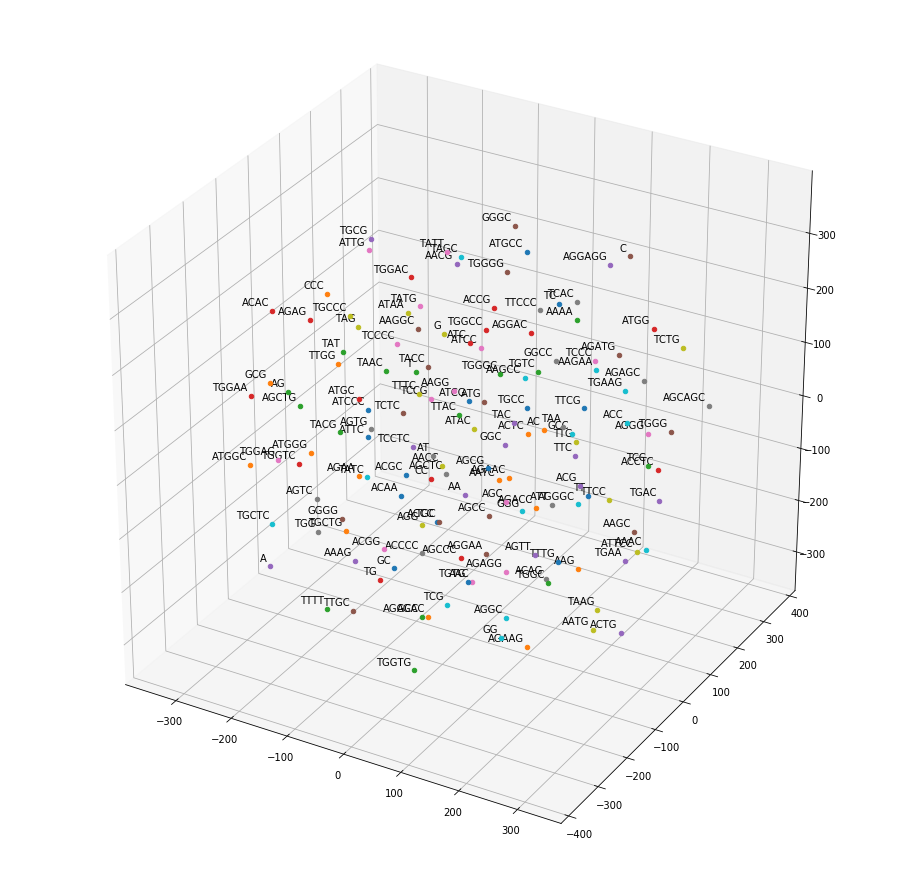

In [10]:
tsne_plot_3D(antonio)